In this file, I will organize the data and make it ready for modeling.

In [1]:
import os
cdir = os.path.abspath(os.path.dirname("__file__"))

import sys
sys.path.insert(0, cdir + "/..")

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


load the data

In [3]:
df = pd.read_table("../data/training.txt",header=None)

In [4]:
df.columns = ["label","words"]

In [5]:
df.head()

,label,words
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


### Some rough EDA

In [6]:
df.shape

(6918, 2)

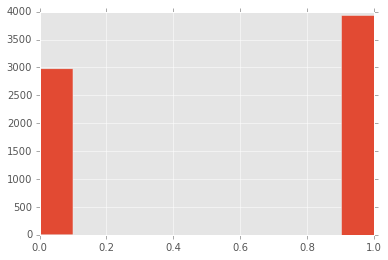

In [7]:
df["label"].hist()

In [8]:
df.label.value_counts()

1    3943
0    2975
Name: label, dtype: int64

In [9]:
df.label.value_counts()/df.shape[0]

1    0.569962
0    0.430038
Name: label, dtype: float64

** The proportions of positive and negative sentiment are about even. ** Now let's check the length of each sample。

(0, 500)

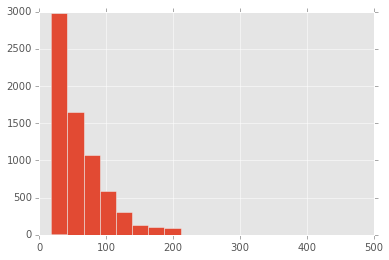

In [10]:
df['words'].apply(lambda x: len(x)).hist(bins = 200)
plt.xlim(0,500)

In [11]:
df['words'].apply(lambda x: len(x)).min(), df['words'].apply(lambda x: len(x)).max()

(18, 4849)

In [12]:
df['words'].apply(lambda x: len(x)).mean()

61.686036426712924

Add length as a new feature.

In [13]:
df["length"] = df['words'].apply(lambda x: len(x))

## Check number of upcases in words

(0, 60)

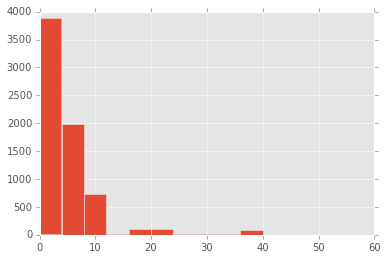

In [14]:
df['words'].apply(lambda x: sum([i.isupper() for i in x])).hist( bins = 70)
plt.xlim(0,60)

In [15]:
df['upper_sum'] = df['words'].apply(lambda x: sum([i.isupper() for i in x]))

## Split training and testing

Before tokenizing and applying tf-idf to the words, we should split the data into trainning and testing sets. 

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
y = df.pop("label").values
X = df.values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

Wrote a class function word_processor to process training and testing sets with the following steps
1. Tokenize training set
2. stemming
3. lemmatizing


In [93]:
from modules.word_process import *

In [95]:
train = word_processor(X_train,0)

In [96]:
words_train = train.process('porter')

## apply tfidf vectorizer

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
tfidf = TfidfVectorizer(stop_words="english")

In [101]:
tfidf_words_train = tfidf.fit_transform(words_train)

## pickle df, X_train, tfidf_words_train, y_train, X_test and y_test

In [102]:
import cPickle as pickle

In [106]:
pickle_lis = [df,X_train,tfidf_words_train,y_train,X_test,y_test]

In [113]:
pickle_lis_str = ["df","X_train","tfidf_words_train","y_train","X_test","y_test"]

In [124]:
with open('../data/df.pkl','w') as f:
    pickle.dump(df,f)

In [129]:
for i,p in enumerate(pickle_lis_str):
    direct = '../data/processed/{}.pkl'.format(p)
    pickle.dump(pickle_lis[i],open(direct,'w'))